# Comparando, Tratando e Mesclando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [4]:
import pandas as pd

#às vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';',encoding='ISO-8859-1')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';',encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';',encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';',encoding='ISO-8859-1')

#usaremos o display para ver todos os dataframes
display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,ÿNome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ÿID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [5]:
clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)  # axis=1 estamos tirando colunas/ axis=0 estamos tirando linhas
display(clientes_df)

,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


In [7]:
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
display(produtos_df)

,ID Produto,Nome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


### Agora vamos juntar os dataframes para ter 1 único dataframe com tudo "bonito"

- Obs: O merge precisa das colunas com o mesmo nome para funcionar. Se não tiver, você precisa alterar o nome da coluna com o .rename

In [8]:
#juntando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')




In [9]:
#exibindo o dataframe final
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


In [6]:
# Renomeando colunas que estavam com nomes diferentes
produtos_df = produtos_df.rename(columns={'ÿNome do Produto': 'Nome do Produto'})
display(produtos_df)

lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})
display(lojas_df)

clientes_df = clientes_df.rename(columns={'ÿID Cliente' : 'ID Cliente'})
display(clientes_df)

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


In [17]:
#vamos renomear o e-mail para ficar claro que é do cliente e de outras colunas que estão com nome diferente
#vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente fffff'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" M200 Gold",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E170 Silver,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


In [16]:
# Ajustar para mostrar o conteúdo completo de strings
pd.set_option('display.max_colwidth', None)

# Ajustar para evitar quebra de colunas na visualização
pd.set_option('display.width', 1000)

### Agora podemos começar as análises

Usaremos o método .value_counts() para contar quantas vezescada valor do Dataframe aparece

Usaremos o método .plot() para exibir um gráfico

In [ ]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15,5))


### Qual loja mais vendeu?

Usaremos o groupby para agrupar o nosso dataframe, de acordo com o que queremos(somando as quantidades de vendas, por exemplo)

In [ ]:
vendas_lojas = vendas_df.groupby('Nome da Loja').sum(numeric_only=True)       # o sum seria para somar todos os valores que foram agrupados
vendas_lojas = vendas_lojas[['Quantidade Vendida']] # Podemos filtrar as colunas que quisermos
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


In [31]:
# ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida')  # vai ordernar baseado no valor de alguma coluna, a coluna nós temos que passar
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234
Loja Contoso Racine No.2,253
Loja Contoso Marseille,370
Loja Contoso Paterson,371
Loja Contoso Berlin,379
...,...
Loja Contoso North America Reseller,520176
Loja Contoso Asia Online,578458
Loja Contoso Europe Online,616845


<Axes: xlabel='Nome da Loja'>

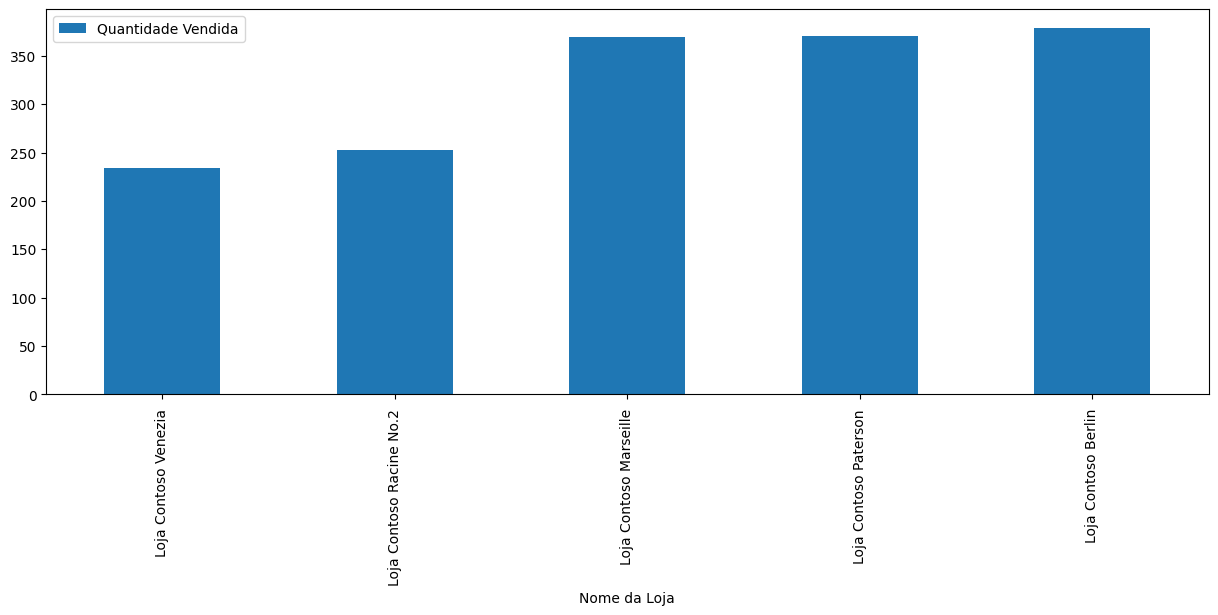

In [33]:
# Podemos plotar em um gráfico
vendas_lojas[:5].plot(figsize=(15,5), kind='bar')